# Day 2: Choosing the Right Statistical Test
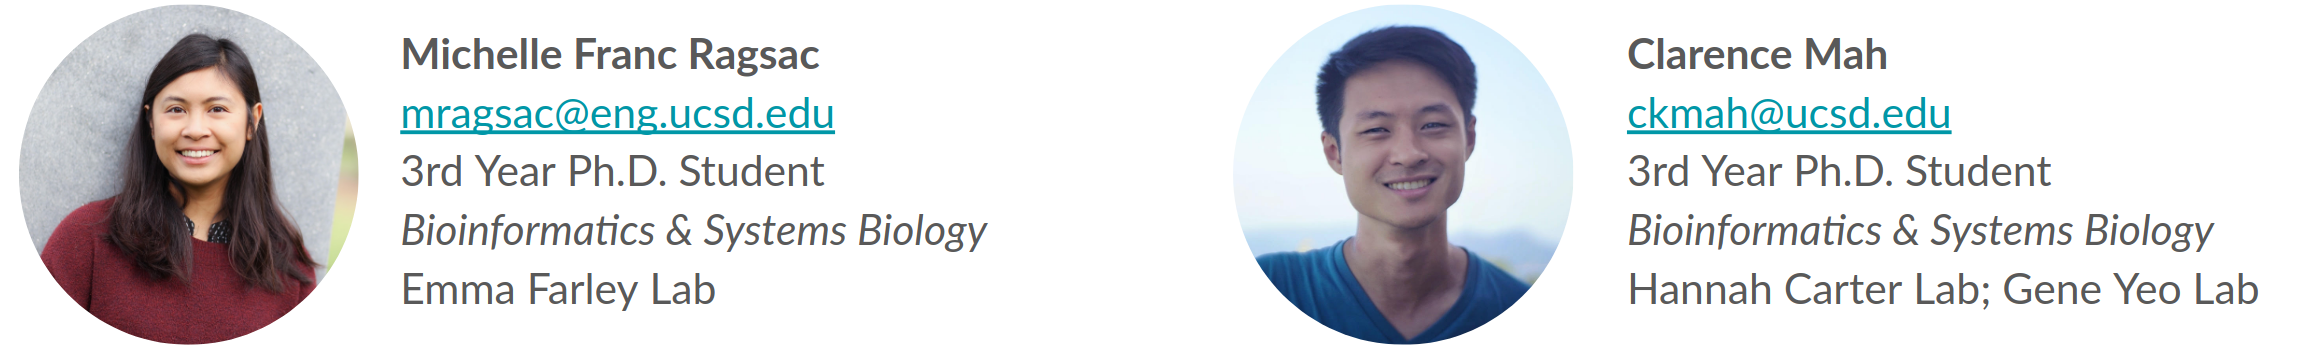

># Goals
> 1. Hypothesis Testing
> 2. Types of Variables
> 3. Types of Tests
> 4. Choosing the Right Test

# 1. Framing your hypothesis

You may have an idea, prediction, or theory that you want to explore. Hypothesis testing is a process to **quantitatively** investigate your hypotheses.

### Hypothesis checklist

To make sure your hypothesis is testable, it needs to clearly contain:
- The relevant variables
- The specific group being studied
- The predicted outcome of the experiment/analysis

## Exploring penguin flippers

Let's say we suspect that flipper length varies between penguin species, specifically between the Adelie and Chinstrap species.

**What would a hypothesis look like?**

- The relevant variables: `flipper length`
- The specific group being studied: `Adeli and Chinstrap penguins`
- The predicted outcome of the experiment/analysis: `different flipper lengths`

$H_a$ **(alternate hypothesis)**: Adelie penguins have different sized flippers than Chinstrap penguins.

$H_0$ **(null hypothesis)**: Adelie penguins do not have different sized flippers than Chinstrap penguins.

### Definitions

- **Alternate hypothesis**: usually states the predicted relationship between variables
- **Null hypothesis**: usually states **no** relationship between variables; status quo

# Testing your hypothesis

This is where statistical tests come in (z-tests, t-tests, etc.). The outcome of these tests provide **evidence** that **support** or **refute** your null hypothesis. Generally, your test will generate two things:
1. A **test statistic**: a t-test statistic for instance, is an estimate of the **difference in means** of the two groups
2. A **p-value**: a t-test p-value is the **probability of observing** this difference assuming the null hypothesis

# 2. Choosing the Right Test

<details>
    <summary>Useful Cheatsheets!</summary>
  
  ## Parametric Test
  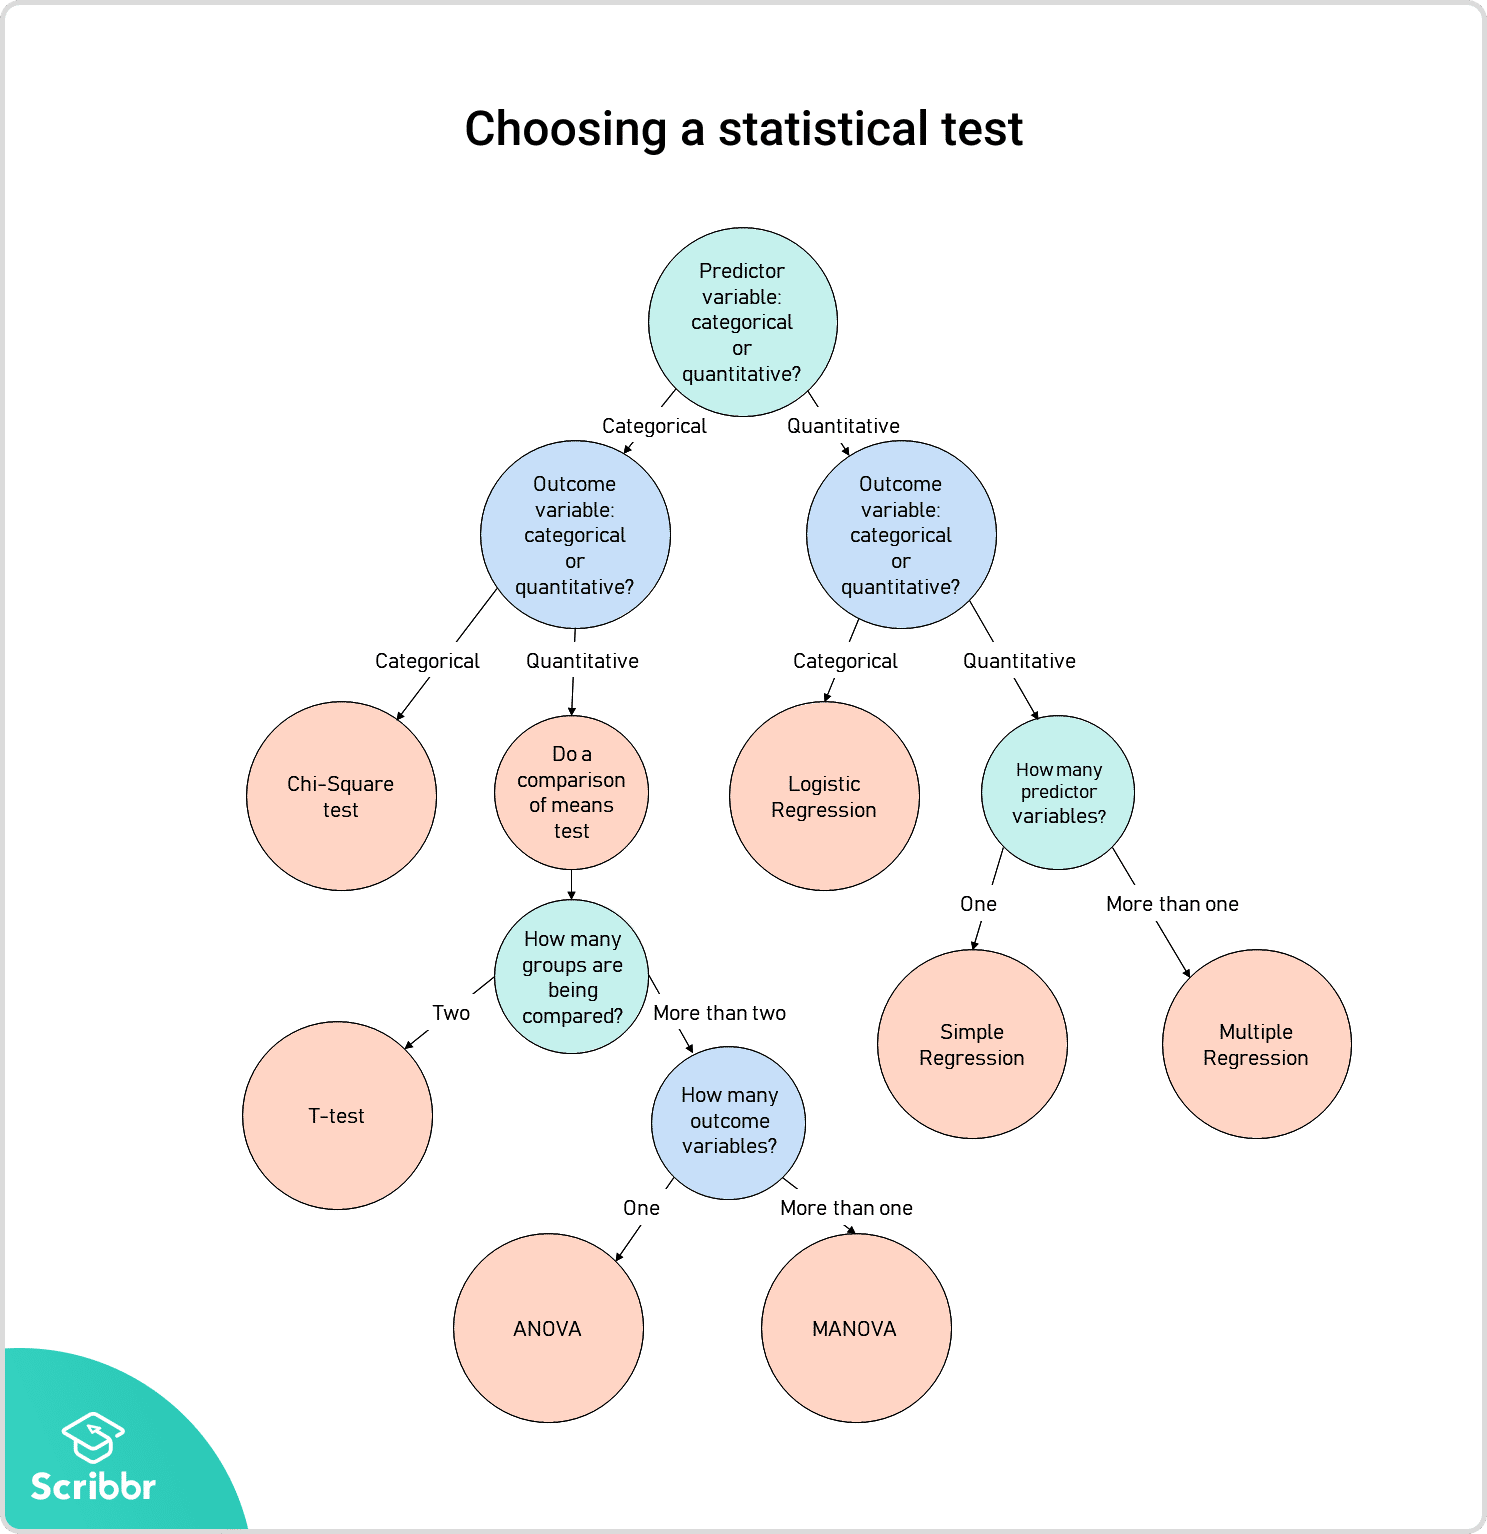
    
  ## Non-Parametric Tests
  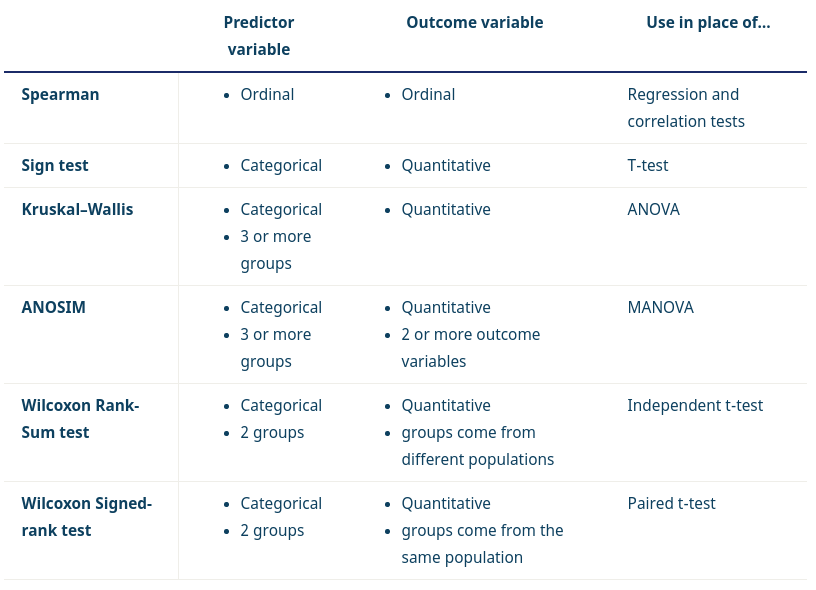
</details>

## Types of variables
- Quantitative
- Categorical

## Parametric tests
Parametric tests are usually able to make stronger conclusions from the data because they assume properties about your data, including:

1. Independence of observations
2. Homogeneity of variance
3. The data follows a normal distribution

## Non-parametric tests
Non-parametric tests do not require the distribution of your data to meet these assumptions, but their conclusions are more conservative than parametric tests.

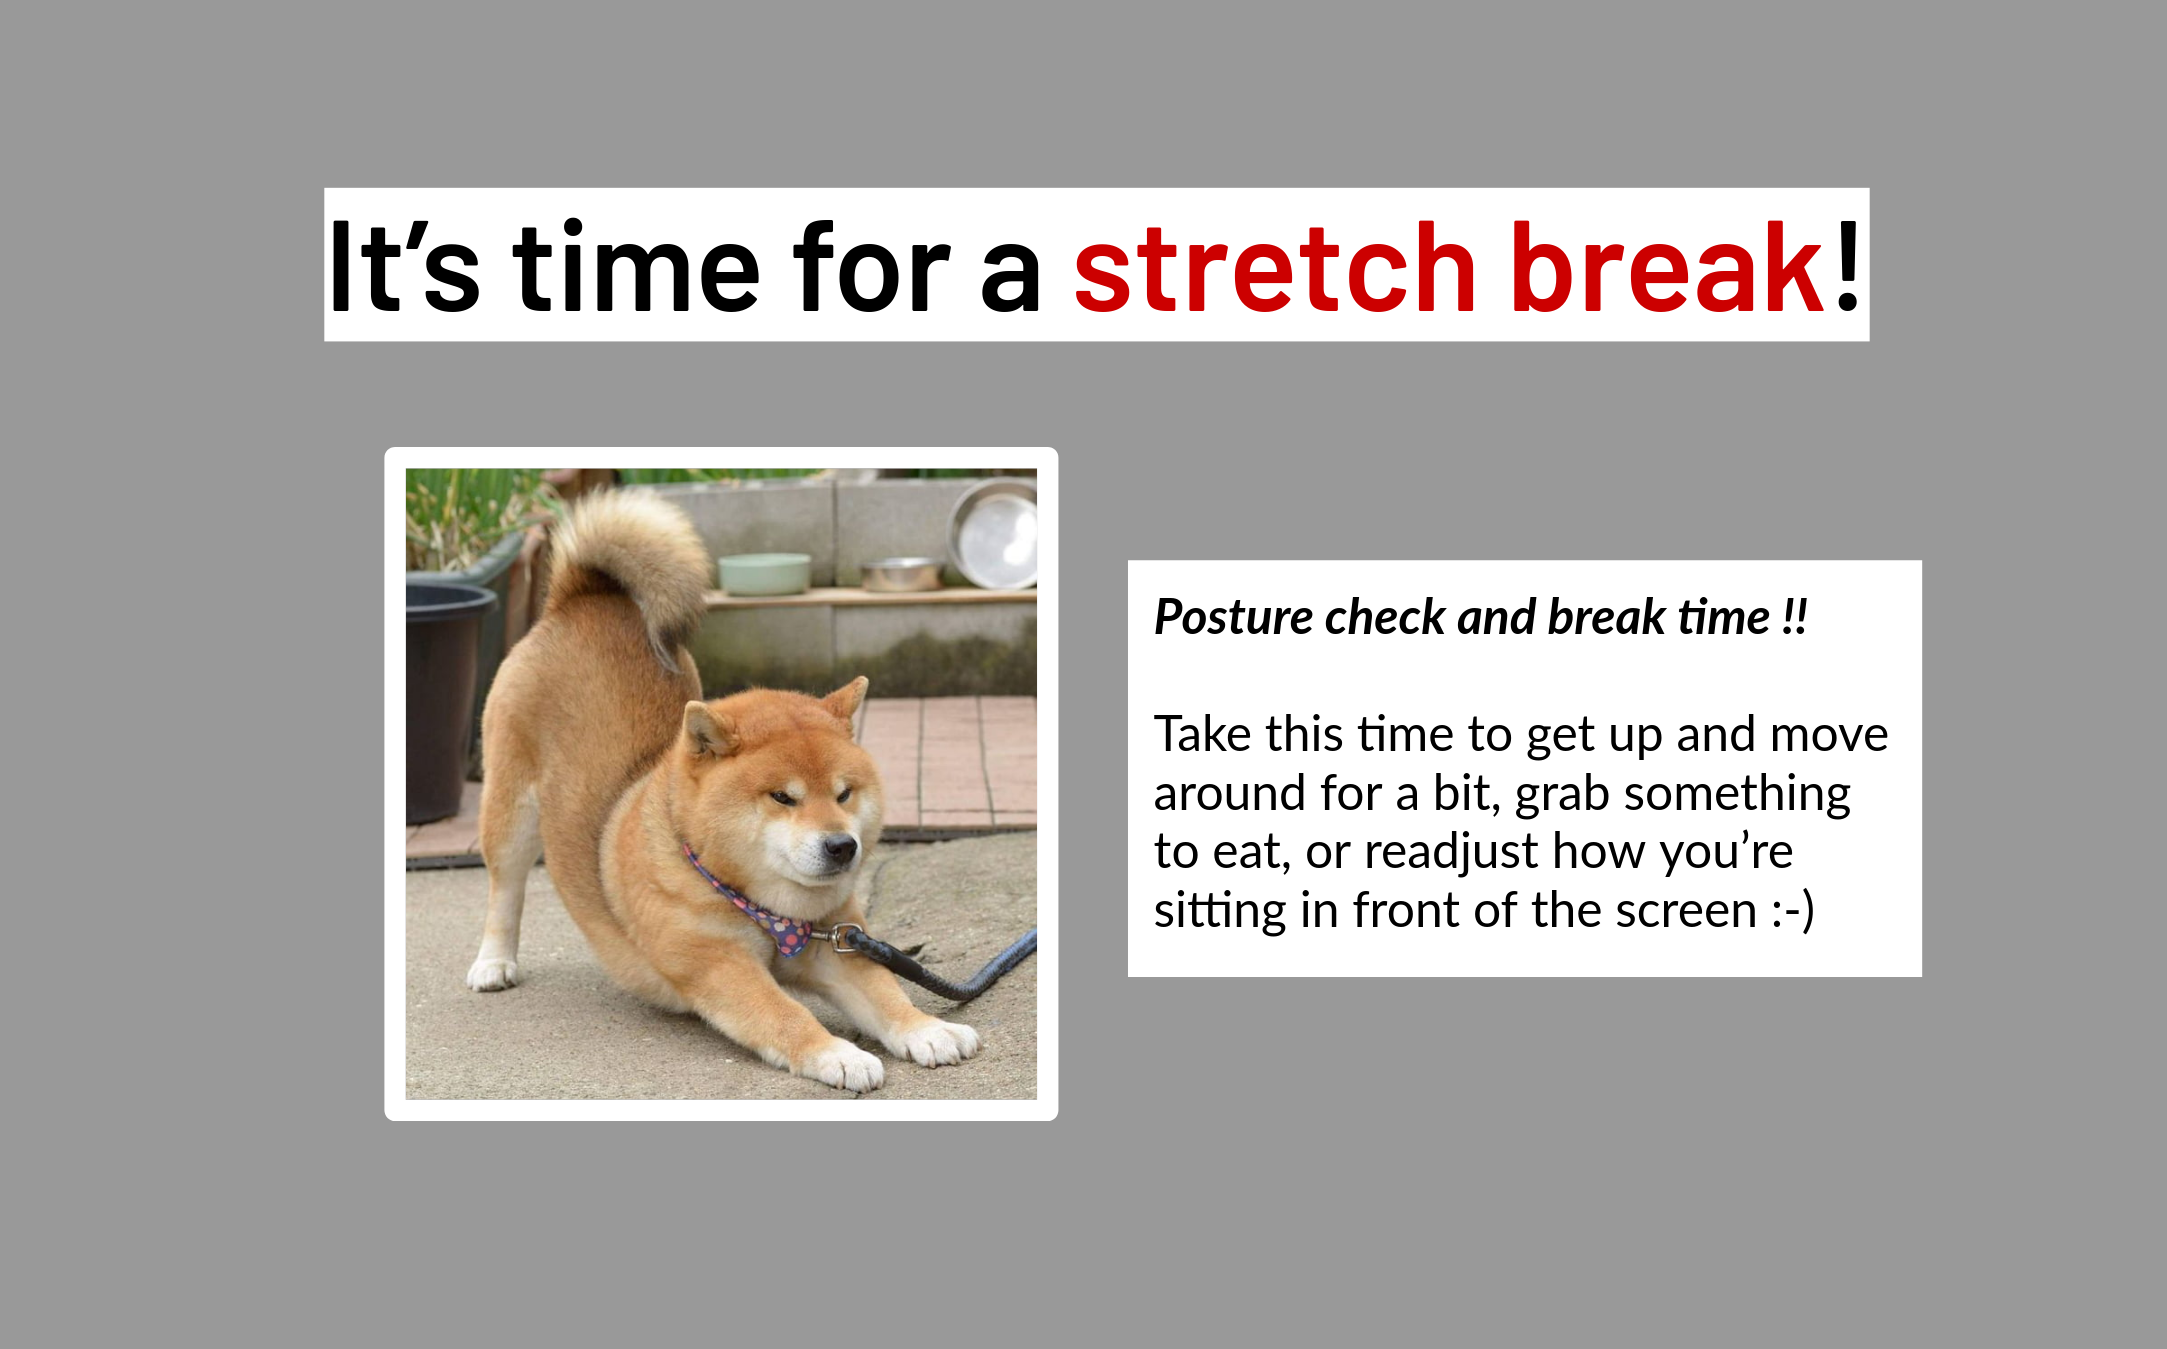

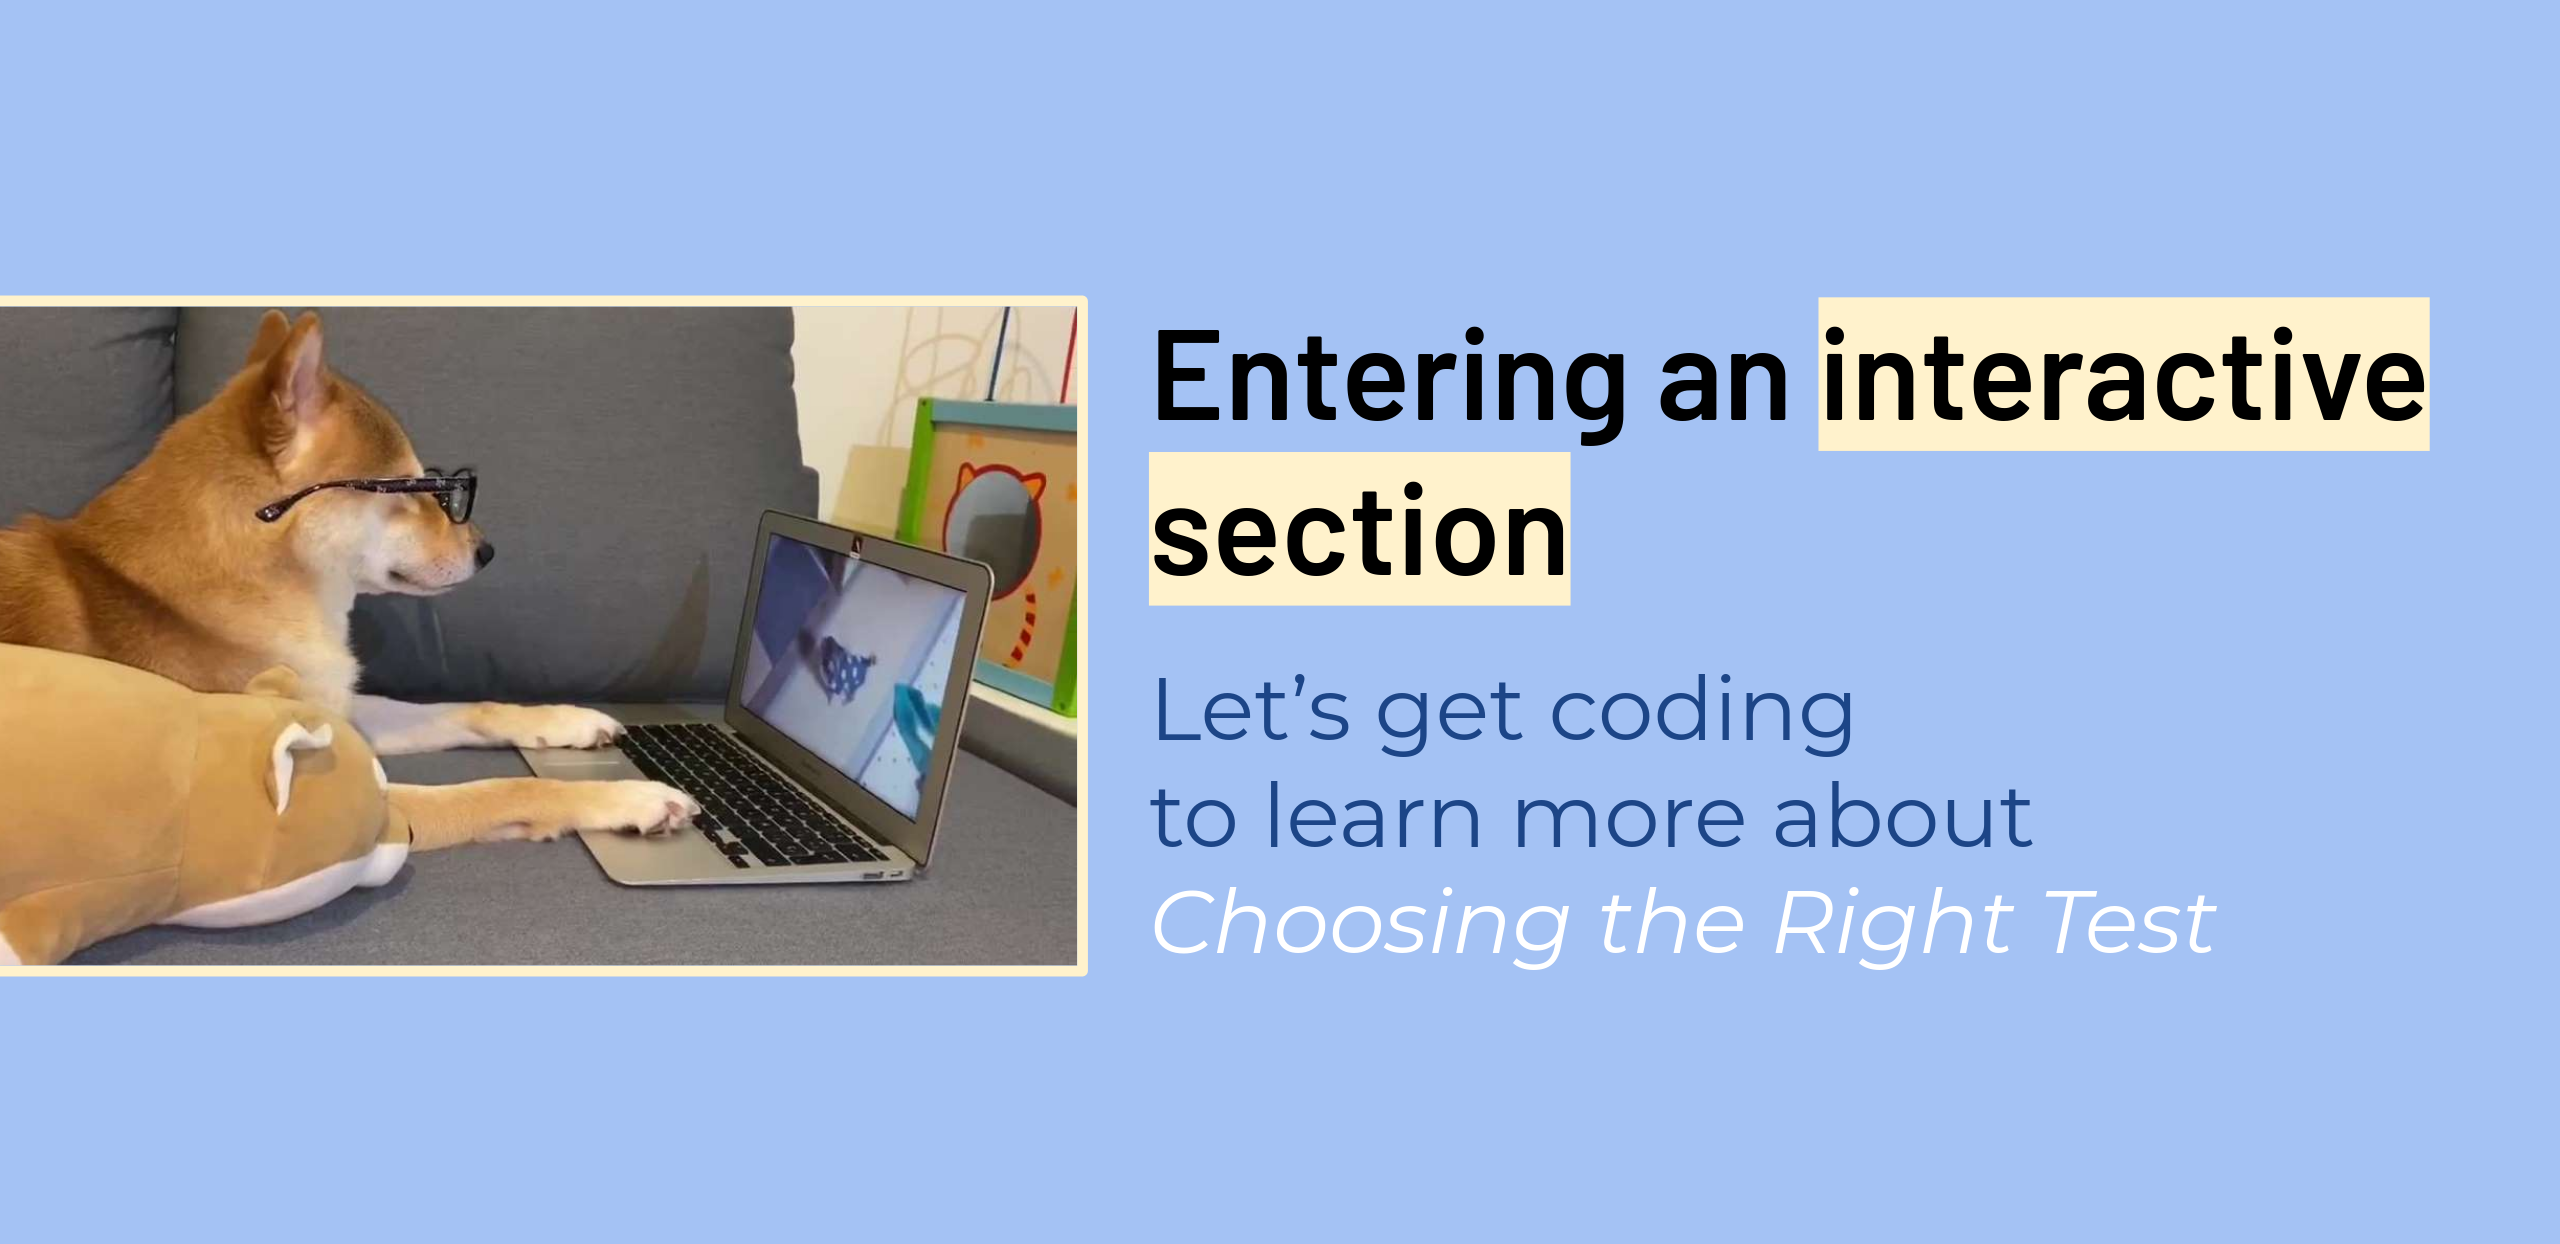

# Load penguins data

In [13]:
# Import seaborn package
import seaborn as sns

# Load the penguins data set
penguins = sns.load_dataset("penguins")

# Remove samples with missing data
penguins = penguins.dropna()

In [127]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male

In [140]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [141]:
penguins.describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000

Which variables are quantitative? Categorical?

In [145]:
penguins.nunique()

species                3
island                 3
bill_length_mm       163
bill_depth_mm         79
flipper_length_mm     54
body_mass_g           93
sex                    2
dtype: int64

How many species are there?

In [16]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

Let's see an overview of our **quantitiative** variables.

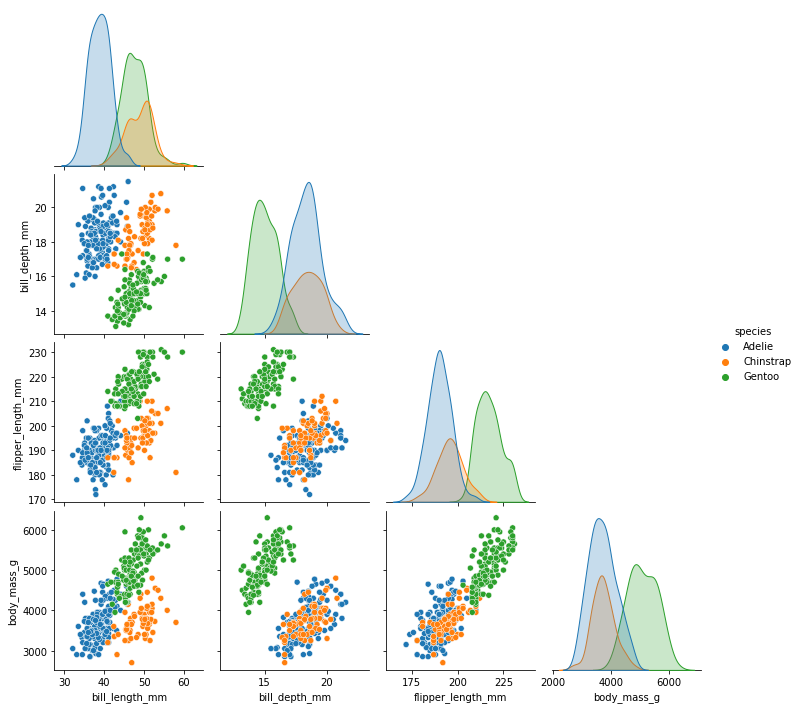

In [146]:
sns.pairplot(penguins, hue='species', corner=True)

Flipper length distribution between species

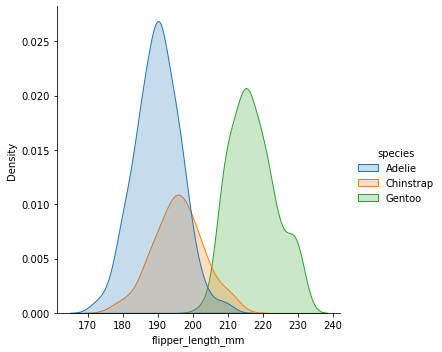

In [30]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', kind='kde', fill=True)

# Test our hypothesis!

$H_a$ **(alternate hypothesis)**: Adelie penguins have different sized flippers than Chinstrap penguins.

$H_0$ **(null hypothesis)**: Adelie penguins do not have different sized flippers than Chinstrap penguins.

Select subsets

In [18]:
adelie = penguins.loc[penguins['species'] == 'Adelie']

In [119]:
adelie.shape

(146, 7)

In [ ]:
# TODO
chinstrap = None

In [17]:
# Answer
chinstrap = penguins.loc[penguins['species'] == 'Chinstrap']

In [120]:
chinstrap.shape

(68, 7)

In [117]:
from scipy import stats

## What is the appropriate test for our hypothesis?

### Perform the parametric test

In [28]:
stats.ttest_ind(adelie['flipper_length_mm'], chinstrap['flipper_length_mm'])

Ttest_indResult(statistic=-5.797900789295094, pvalue=2.413241410912911e-08)

Does the outcome of your test support or refute your null hypothesis?

### Peform the non-parametric test

Perform Wilcoxon rank-sum test

In [118]:
stats.ranksums(adelie['flipper_length_mm'], chinstrap['flipper_length_mm'])

RanksumsResult(statistic=-5.38820859987314, pvalue=7.116342814208414e-08)

Note that even though we come to the same conclusion, the non-parametric test is more conservative!

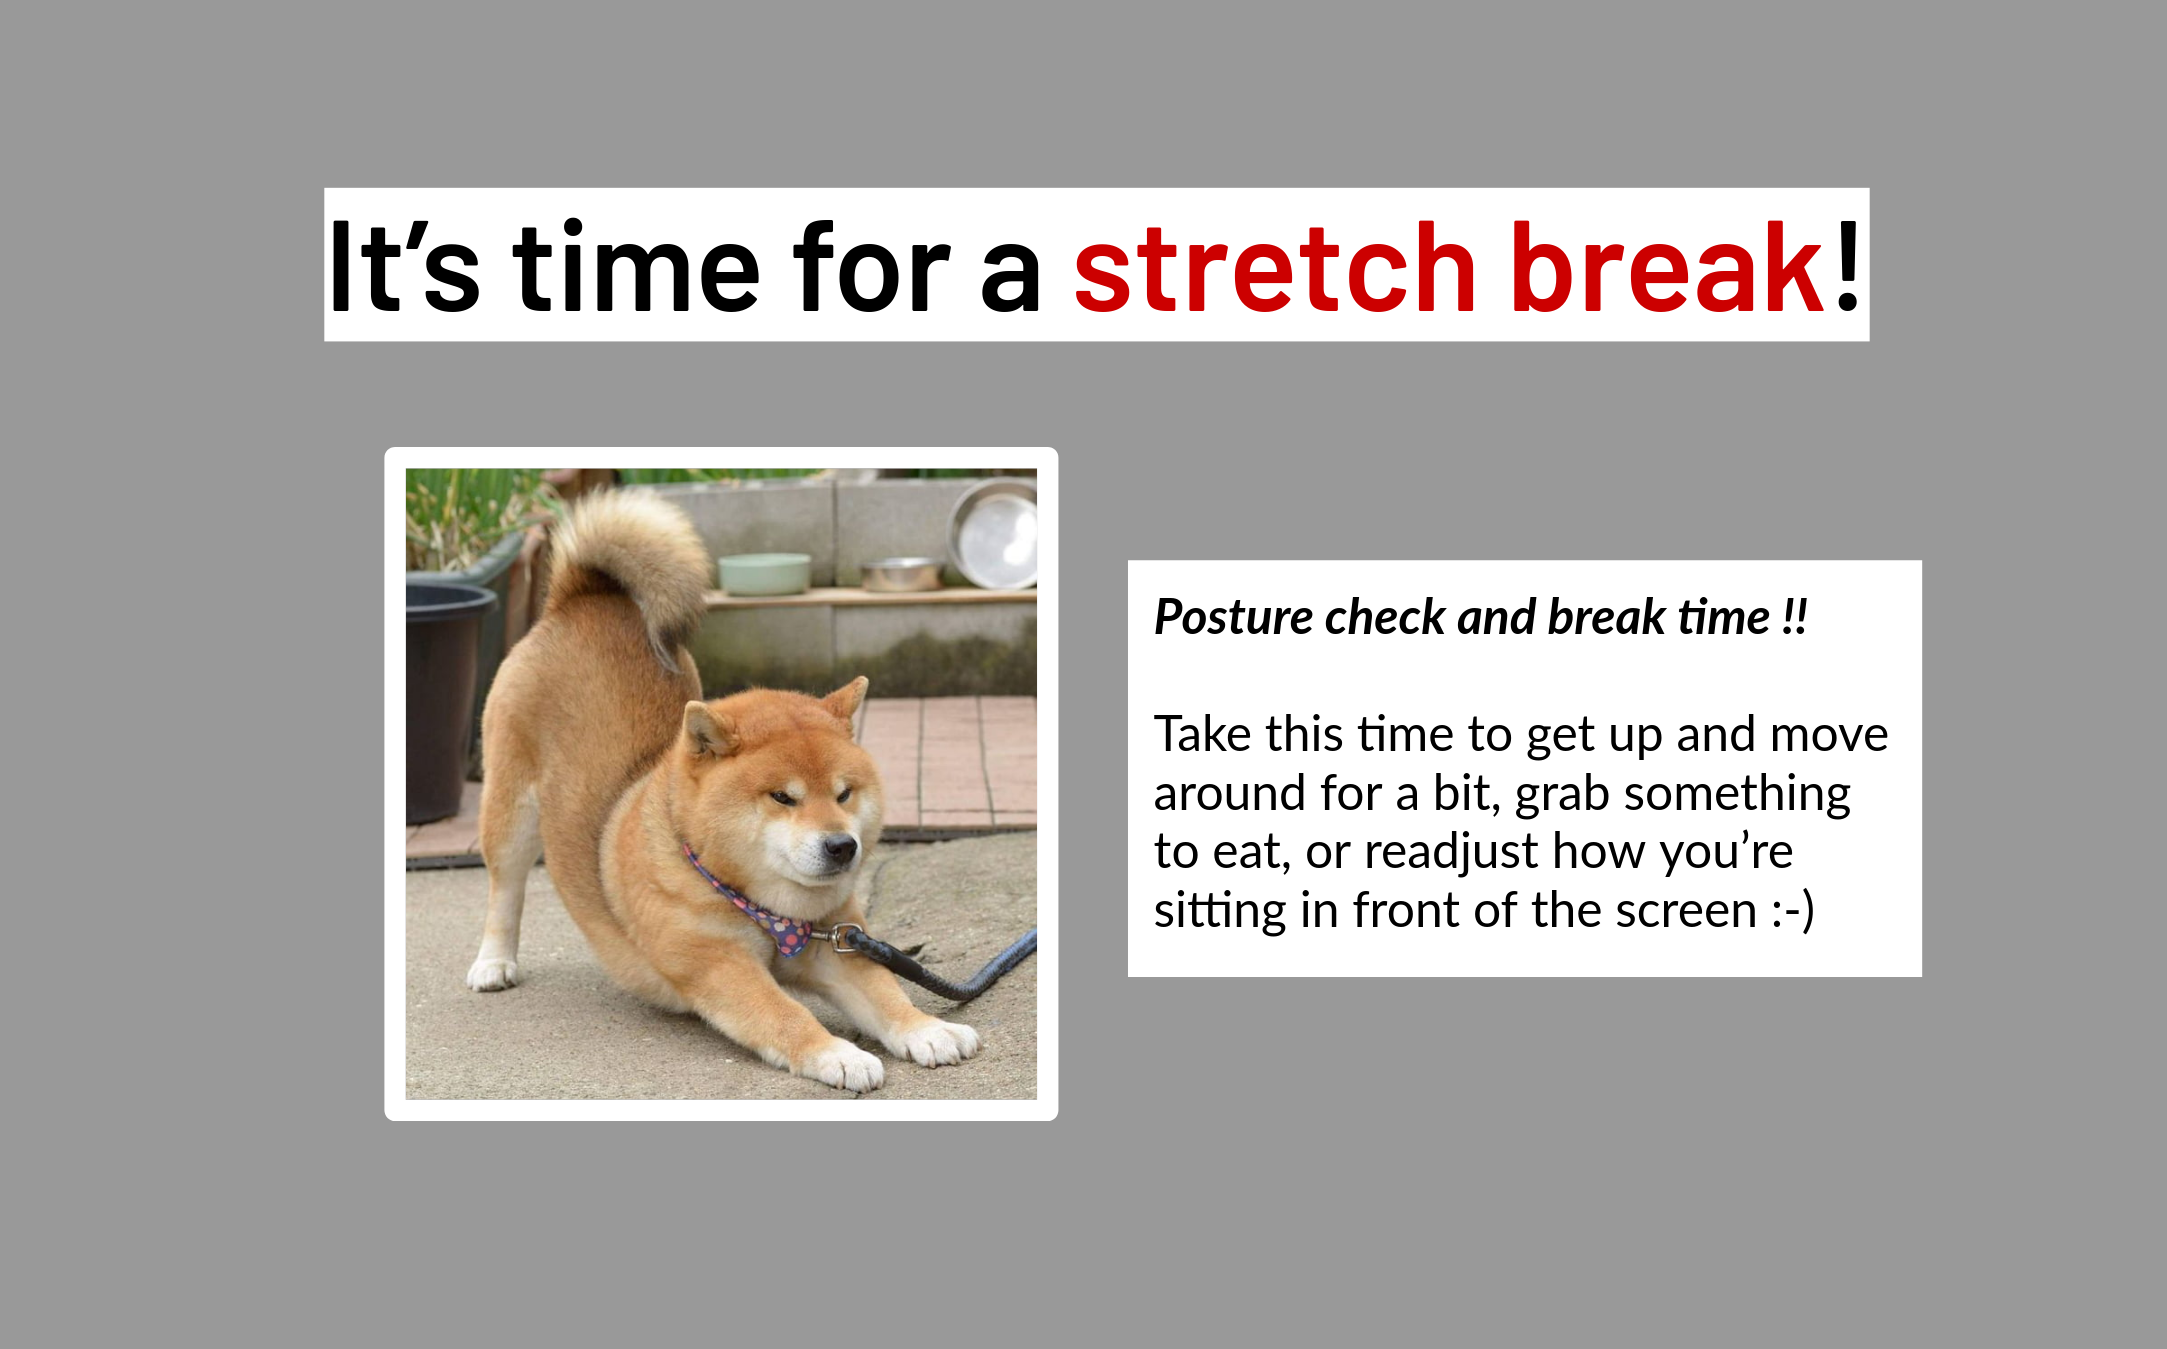

# Are my variables related?
`Correlation is not causation`

http://www.tylervigen.com/spurious-correlations

In [149]:
stats.pearsonr(penguins['flipper_length_mm'], penguins['body_mass_g'])

(0.8729788985653614, 3.132836250971883e-105)

In [150]:
stats.spearmanr(penguins['flipper_length_mm'], penguins['body_mass_g'])

SpearmanrResult(correlation=0.8403902050259514, pvalue=4.630423990534208e-90)

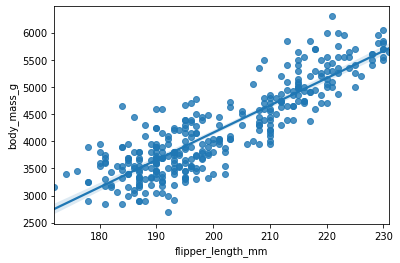

In [153]:
sns.regplot(x=penguins['flipper_length_mm'], y=penguins['body_mass_g'])

In [151]:
penguins.corr(method='pearson')

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000

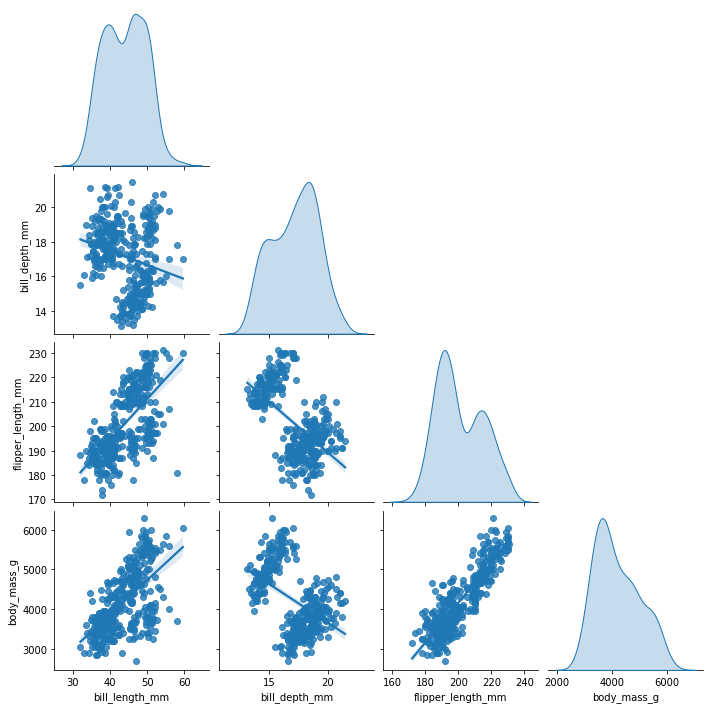

In [162]:
sns.pairplot(penguins, kind='reg', diag_kind='kde', corner=True)